## Business Objective of Case Study

Provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not
The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

## Goals of Analysis

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Importing Pandas and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Supress warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the DataSet

In [2]:
#Importing the dataset
XEdu= pd.read_csv("Lead Scoring Assignment//Leads.csv")

In [3]:
XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Inspect the  of the dataset
print(XEdu.shape)
print(XEdu.columns)
print(XEdu.info())
print(XEdu.describe())

(9240, 37)
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### Step 1- Data Cleaning

In [5]:
## In the case study it is given to treat all Select as null
XEdu.replace({'Select': np.nan}, inplace=True)

In [6]:
print(XEdu.isnull().values.any())
print(XEdu.isnull().values.sum())
print(XEdu.isnull().sum()*100/XEdu.shape[0])

True
54419
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                       

In [7]:
#printing unique values in columns
print(XEdu["Prospect ID"].nunique())
print(XEdu["Lead Number"].nunique())
print(XEdu["Lead Origin"].nunique())
print(XEdu["Lead Source"].nunique())
print(XEdu["Do Not Email"].nunique())
print(XEdu["Do Not Call"].nunique())
#OR
print(XEdu["Do Not Call"].value_counts())

9240
9240
5
21
2
2
No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [8]:
#printing unique values in columns
print(XEdu["Converted"].nunique())
print(XEdu["TotalVisits"].nunique())
print(XEdu["Total Time Spent on Website"].nunique())
print(XEdu["Page Views Per Visit"].nunique())
print(XEdu["Last Activity"].nunique())


2
41
1731
114
17


In [9]:
#printing unique values in columns
print(XEdu["Country"].nunique())
print(XEdu["Specialization"].nunique())
print(XEdu["How did you hear about X Education"].nunique())
print(XEdu["What is your current occupation"].nunique())
print(XEdu["What matters most to you in choosing a course"].nunique())
print(XEdu["Search"].nunique())

38
18
9
6
3
2


In [10]:
#printing unique values in columns
print(XEdu["Magazine"].nunique())
print(XEdu["Newspaper Article"].nunique())
print(XEdu["Newspaper Article"].value_counts())
print(XEdu["X Education Forums"].nunique())
print(XEdu["Newspaper"].nunique())
print(XEdu["Digital Advertisement"].nunique())
print(XEdu["Through Recommendations"].nunique())

1
2
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
2
2
2
2


In [11]:
#printing unique values in columns
print(XEdu["Receive More Updates About Our Courses"].nunique())
print(XEdu["Tags"].nunique())
print(XEdu["Lead Quality"].nunique())
print(XEdu["Update me on Supply Chain Content"].nunique())
print(XEdu["Get updates on DM Content"].nunique())
print(XEdu["Lead Profile"].nunique())

1
26
5
1
1
5


In [12]:

#printing unique values in columns
print(XEdu["City"].nunique())
print(XEdu["Asymmetrique Activity Index"].nunique())
print(XEdu["Asymmetrique Profile Index"].nunique())
print(XEdu["Asymmetrique Activity Score"].nunique())
print(XEdu["Asymmetrique Profile Score"].nunique())

6
3
3
12
10


In [13]:

#printing unique values in columns
print(XEdu["I agree to pay the amount through cheque"].nunique())
print(XEdu["A free copy of Mastering The Interview"].nunique())
print(XEdu["Last Notable Activity"].nunique())

1
2
16


In [14]:
#Since the result of nunique() gives 1or2 means all columns have same value.
#Droping both
XEdu=XEdu.drop(['Magazine','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [15]:
XEdu.shape

(9240, 28)

In [16]:
# drop any column above 29% nulls
XEdu=XEdu.drop(['City','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [17]:
XEdu.shape

(9240, 16)

In [18]:
#Na Handling
print(XEdu.isnull().values.any())
print(XEdu.isnull().values.sum())
print(XEdu.isnull().sum()*100/XEdu.shape[0])

True
2874
Prospect ID                     0.000000
Lead Number                     0.000000
Lead Origin                     0.000000
Lead Source                     0.389610
Do Not Email                    0.000000
Do Not Call                     0.000000
Converted                       0.000000
TotalVisits                     1.482684
Total Time Spent on Website     0.000000
Page Views Per Visit            1.482684
Last Activity                   1.114719
Country                        26.634199
Search                          0.000000
Newspaper Article               0.000000
X Education Forums              0.000000
Last Notable Activity           0.000000
dtype: float64


In [19]:
XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,Newspaper Article,X Education Forums,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No,No,No,Modified


We found that there are columns which has less variation and therfore won't bring much useful insight. So we should drop them on the go

In [20]:
print(XEdu['Lead Origin'].nunique())
print(XEdu['Lead Origin'].value_counts())

5
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [21]:
print(XEdu["Lead Source"].nunique())
print(XEdu["Lead Source"].value_counts())

21
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
testone                 1
welearnblog_Home        1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64


In [22]:
print(XEdu['Do Not Email'].nunique())
print(XEdu['Do Not Email'].value_counts())

2
No     8506
Yes     734
Name: Do Not Email, dtype: int64


In [23]:
print(XEdu['Do Not Call'].nunique())
print(XEdu['Do Not Call'].value_counts())

2
No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [24]:
#this will not help to derive a conclusion as there is little or no variance in values. 
#as 99% is concentrated in a single vlaue. Hence, drop Do Not Call also
XEdu=XEdu.drop(['Do Not Call'],1)

In [25]:
print(XEdu['Converted'].nunique())
print(XEdu['Converted'].value_counts())

2
0    5679
1    3561
Name: Converted, dtype: int64


In [26]:
print(XEdu['TotalVisits'].nunique())
print(XEdu['TotalVisits'].value_counts())

41
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64


In [27]:
print(XEdu['Total Time Spent on Website'].nunique())
print(XEdu['Total Time Spent on Website'].value_counts())

1731
0       2193
60        19
127       18
75        18
74        18
157       17
234       17
32        17
87        17
62        17
69        16
213       16
96        16
176       15
68        15
94        15
71        15
247       15
129       15
33        15
12        15
31        14
100       14
78        14
49        14
151       14
139       14
14        14
63        14
2         14
        ... 
659        1
611        1
1675       1
603        1
587        1
571        1
523        1
483        1
435        1
2226       1
915        1
923        1
939        1
971        1
1667       1
1555       1
1547       1
1515       1
1443       1
1355       1
1339       1
1307       1
1299       1
1267       1
1251       1
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64


In [28]:
print(XEdu['Page Views Per Visit'].nunique())
print(XEdu['Page Views Per Visit'].value_counts())

114
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64


In [29]:
print(XEdu['Last Activity'].nunique())
print(XEdu['Last Activity'].value_counts())

17
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


In [30]:
print(XEdu["Country"].nunique())
print(XEdu["Country"].value_counts())

38
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Philippines                2
China                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
Belgium                    2
Ghana                      2
Italy                      2
Malaysia                   1
Indonesia                  1
Vietnam                    1
Kenya                      1
Tanzania                   1
Russia                     1
Switzerland

In [31]:
#6492 India means almost 80 % is India. This means you have 80% columns with same value. 
#this will not help to derive a conclusion as there is little or no variance in values. 
#as 80% is concentrated in a single vlaue. Hence, drop Country also
XEdu=XEdu.drop(['Country'],1)

In [32]:
print(XEdu['Search'].nunique())
print(XEdu['Search'].value_counts())

2
No     9226
Yes      14
Name: Search, dtype: int64


In [33]:
#this will not help to derive a conclusion as there is little or no variance in values. 
#as 98% is concentrated in a single vlaue. Hence, drop [Search] also
XEdu=XEdu.drop(['Search'],1)

In [34]:
print(XEdu['Newspaper Article'].nunique())
print(XEdu['Newspaper Article'].value_counts())

2
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


In [35]:
#this will not help to derive a conclusion as there is little or no variance in values. 
#as 99% is concentrated in a single vlaue. Hence, drop [Newspaper Article] also
XEdu=XEdu.drop(['Newspaper Article'],1)

In [36]:
print(XEdu['X Education Forums'].nunique())
print(XEdu['X Education Forums'].value_counts())

2
No     9239
Yes       1
Name: X Education Forums, dtype: int64


In [37]:
#this will not help to derive a conclusion as there is little or no variance in values. 
#as 99% is concentrated in a single vlaue. Hence, drop [X Education Forums] also
XEdu=XEdu.drop(['X Education Forums'],1)

In [38]:
print(XEdu['Last Notable Activity'].nunique())
print(XEdu['Last Notable Activity'].value_counts())

16
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


In [39]:
# NA handling
print(XEdu.isnull().values.any())
print(XEdu.isnull().values.sum())
print(XEdu.isnull().sum()*100/XEdu.shape[0])

True
413
Prospect ID                    0.000000
Lead Number                    0.000000
Lead Origin                    0.000000
Lead Source                    0.389610
Do Not Email                   0.000000
Converted                      0.000000
TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Page Views Per Visit           1.482684
Last Activity                  1.114719
Last Notable Activity          0.000000
dtype: float64


In [40]:
XEdu.shape

(9240, 11)

In [41]:
#Drop NAN 
XEdu.dropna(axis=0,how= 'any',inplace=True)
XEdu.shape[1]

11

In [42]:
print(XEdu.isnull().values.any())
print(XEdu.isnull().values.sum())
print(XEdu.isnull().sum()*100/XEdu.shape[0])

False
0
Prospect ID                    0.0
Lead Number                    0.0
Lead Origin                    0.0
Lead Source                    0.0
Do Not Email                   0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Last Notable Activity          0.0
dtype: float64


### Replacing Inconsistencies in the data

In [43]:
print(XEdu["Lead Source"].nunique())
print(XEdu["Lead Source"].value_counts())

21
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
testone                 1
welearnblog_Home        1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64


In [44]:

XEdu['Lead Source'].replace({'google':'Google'}, inplace = True)
XEdu['Lead Source'].replace({'WeLearn':'welearnblog_Home'}, inplace = True)

In [45]:
XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified


### Checking for Outliers

In [46]:
XEdu.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


### Outliers Treatment

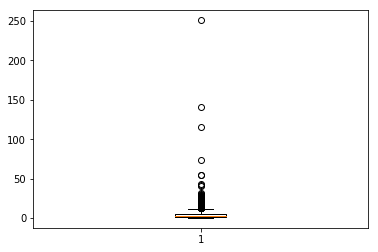

In [47]:
#As we can see 99quantile and max value  for Total Visits and Page Views per visit  us far different . 
#So we need to take care of the outliers for these two

#Outliers Treatment for TotalVisits
plt.boxplot(XEdu.TotalVisits)
Q1=XEdu.TotalVisits.quantile(0.25)
Q3=XEdu.TotalVisits.quantile(0.75)
IQR=Q3-Q1
XEdu=XEdu[(XEdu.TotalVisits > Q1-1.5*IQR) & (XEdu.TotalVisits < Q3 + 1.5*IQR)]

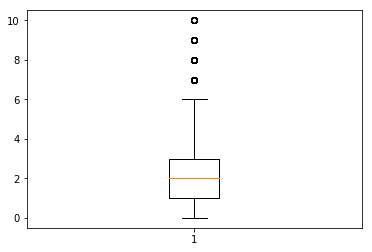

In [48]:
#Outliers Treatment for Page Views Per Visit
plt.boxplot(XEdu['Page Views Per Visit'])
Q1= XEdu['Page Views Per Visit'].quantile(0.25)
Q3= XEdu['Page Views Per Visit'].quantile(0.75)
IQR=Q3-Q1
XEdu=XEdu[(XEdu['Page Views Per Visit'] > Q1-1.5*IQR) & (XEdu['Page Views Per Visit'] < Q3 + 1.5*IQR)]

In [49]:
XEdu.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000
mean,616904.442362,0.375776,2.663299,464.188923,1.961982
std,23252.690948,0.484352,2.297686,541.023069,1.533408
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596275.000000,0.000000,0.000000,0.000000,0.000000
50%,615279.000000,0.000000,2.000000,228.000000,2.000000
75%,636879.000000,1.000000,4.000000,881.500000,3.000000
90%,649703.600000,1.000000,5.000000,1358.600000,4.000000
95%,655214.900000,1.000000,7.000000,1544.000000,5.000000
99%,659520.760000,1.000000,10.000000,1819.720000,5.000000


In [50]:
XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified


In [51]:
# Converting 'Yes'to 1 and 'No' to 0

XEdu['Do Not Email'] = XEdu['Do Not Email'].map({'Yes': 1, 'No': 0})

In [52]:
XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Modified


### Creation of Dummy Variable

In [53]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
cont = pd.get_dummies(XEdu['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
XEdu = pd.concat([XEdu,cont],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
ls = pd.get_dummies(XEdu['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
XEdu = pd.concat([XEdu,ls],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
la = pd.get_dummies(XEdu['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
XEdu = pd.concat([XEdu,la],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
lna = pd.get_dummies(XEdu['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
XEdu = pd.concat([XEdu,lna],axis=1)

XEdu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# We have created dummies for the below variables, so we can drop them
XEdu = XEdu.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity' ], axis = 1)

In [55]:
XEdu.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
#Since 'Lead NUmber' and "Prospect Id" have the same number of unique columns. Hence we can delete one since one column is enough for identification
XEdu = XEdu.drop(['Prospect ID'],1)

In [57]:
XEdu.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
XEdu_ln = XEdu[['Lead Number', 'Converted']]
XEdu = XEdu.drop(['Lead Number'],1)

In [59]:
XEdu.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
## Checking the converted rate

converted = (sum(XEdu['Converted'])/len(XEdu['Converted'].index))*100
converted

37.577601947656724

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [61]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = XEdu.drop(['Converted'],axis=1)

# Putting response variable to y
y = XEdu['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [63]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [64]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8308,0,0.5,0.416813,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3202,0,0.2,0.049296,0.4,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
434,0,0.3,0.274208,0.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5453,0,0.3,0.657570,0.6,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3841,0,0.7,0.064261,0.7,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Step 2- Model Building

In [65]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [67]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 37),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 22),
 ('Lead Source_blog', False, 14),
 ('Lead Source_testone', False, 24),
 ('Lead Source_welearnblog_Home', False, 23),
 ('Lead Source_youtubechannel', False, 19),
 ('Last Activity_Converted to Lead', True, 1),
 

In [68]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [69]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [70]:
# Import statsmodels

import statsmodels.api as sm

In [71]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5750
Model:                            GLM   Df Residuals:                     5734
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.0
Date:                Mon, 10 Jun 2019   Deviance:                       5052.1
Time:                        10:03:39   Pearson chi2:                 5.78e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0792      0.077     -1.023      0.306      -0.231       0.073
Do Not Email                                     -1.9323      0.181    -10.676      0.000      -2.287      -1.578
Total Time Spent on Website                       4.0382      0.154     26.274      0.000       3.737       4.339
Lead Origin_Lead Add Form                         1.2720      1.042      1.220      0.222      -0.771       3.315
Lead Source_Direct Traffic                       -0.4993      0.080     -6.247      0.000      -0.656      -0.343
Lead Source_Reference                             2.6085      1.068      2.443      0.015       0.516       4.701
Lead Source_Welingak Website                      4.7385      1.453      3.262      0.001       1.891       7.586
Last Activity_Converted to Lead                  -1.3989      0.221     -6.342      0.000      -1.831      -0.967
Last Activity_Form Submitted on Website          -0.9161      0.344     -2.662      0.008      -1.591      -0.242
Last Activity_Olark Chat Conversation            -1.4326      0.201     -7.113      0.000      -1.827      -1.038
Last Activity_Page Visited on Website            -0.9040      0.241     -3.745      0.000      -1.377      -0.431
Last Notable Activity_Email Link Clicked         -1.6927      0.259     -6.547      0.000      -2.199      -1.186
Last Notable Activity_Email Opened               -1.4980      0.089    -16.757      0.000      -1.673      -1.323
Last Notable Activity_Modified                   -1.5425      0.107    -14.456      0.000      -1.752      -1.333
Last Notable Activity_Olark Chat Conversation    -1.1938      0.370     -3.227      0.001      -1.919      -0.469
Last Notable Activity_Page Visited on Website    -0.9025      0.327     -2.761      0.006      -1.543      -0.262
=================================================================================================================
"""

### Correlation Matrix

In [72]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

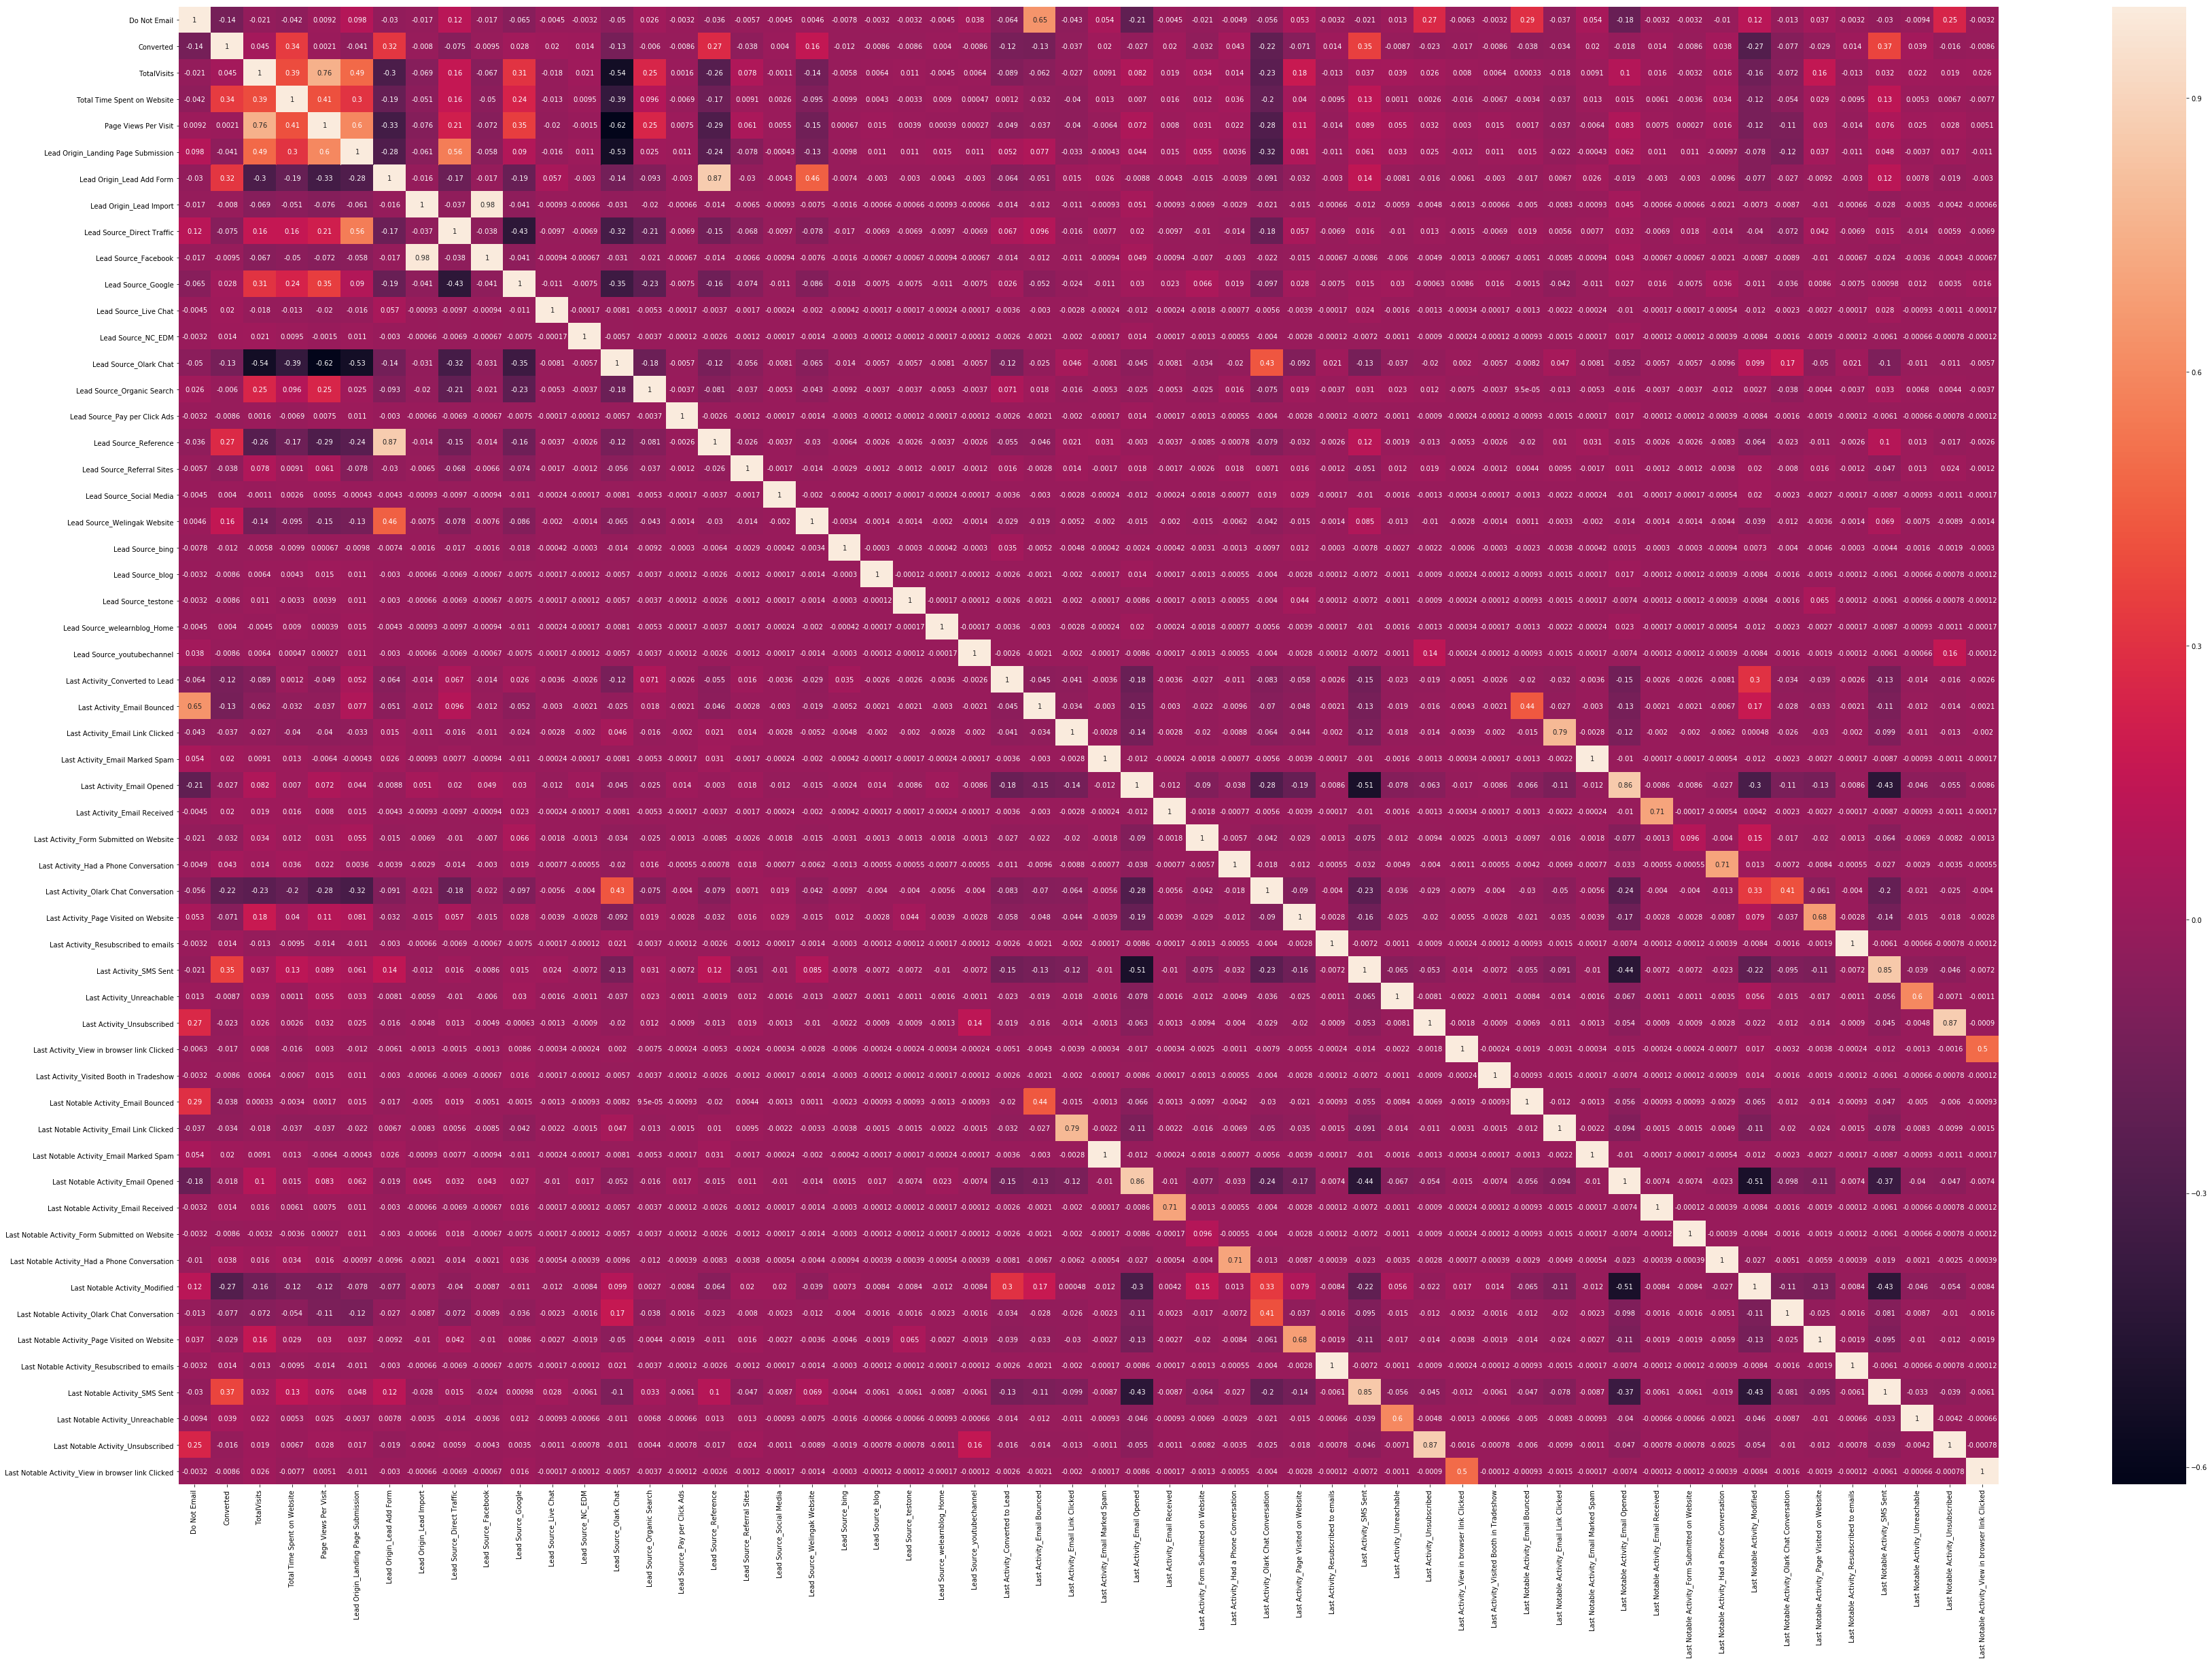

In [73]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,40))        # Size of the figure
sns.heatmap(XEdu.corr(),annot = True)

In the correlation matrix, we can see that there are highly correlated data present but due to the huge data density,the required amount of data can not be fetched out.
So, alternate way is to go for the p-value and VIF 

In [74]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,106.81
4,Lead Source_Reference,80.63
5,Lead Source_Welingak Website,27.05
12,Last Notable Activity_Modified,2.54
9,Last Activity_Page Visited on Website,2.24
14,Last Notable Activity_Page Visited on Website,2.11
8,Last Activity_Olark Chat Conversation,2.00
1,Total Time Spent on Website,1.49
3,Lead Source_Direct Traffic,1.45
13,Last Notable Activity_Olark Chat Conversation,1.41


In [76]:
#first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [77]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5750
Model:                            GLM   Df Residuals:                     5735
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.7
Date:                Mon, 10 Jun 2019   Deviance:                       5053.5
Time:                        10:04:04   Pearson chi2:                 5.78e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0779      0.077     -1.007      0.314      -0.230       0.074
Do Not Email                                     -1.9326      0.181    -10.681      0.000      -2.287      -1.578
Total Time Spent on Website                       4.0350      0.154     26.262      0.000       3.734       4.336
Lead Source_Direct Traffic                       -0.5011      0.080     -6.272      0.000      -0.658      -0.344
Lead Source_Reference                             3.8778      0.243     15.959      0.000       3.402       4.354
Lead Source_Welingak Website                      6.0081      1.014      5.923      0.000       4.020       7.996
Last Activity_Converted to Lead                  -1.4004      0.221     -6.349      0.000      -1.833      -0.968
Last Activity_Form Submitted on Website          -0.9177      0.344     -2.667      0.008      -1.592      -0.243
Last Activity_Olark Chat Conversation            -1.4352      0.201     -7.127      0.000      -1.830      -1.040
Last Activity_Page Visited on Website            -0.9055      0.241     -3.752      0.000      -1.379      -0.432
Last Notable Activity_Email Link Clicked         -1.6927      0.258     -6.548      0.000      -2.199      -1.186
Last Notable Activity_Email Opened               -1.4963      0.089    -16.743      0.000      -1.671      -1.321
Last Notable Activity_Modified                   -1.5406      0.107    -14.442      0.000      -1.750      -1.332
Last Notable Activity_Olark Chat Conversation    -1.1917      0.370     -3.222      0.001      -1.917      -0.467
Last Notable Activity_Page Visited on Website    -0.8876      0.326     -2.721      0.007      -1.527      -0.248
=================================================================================================================
"""

In [78]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,2.53
8,Last Activity_Page Visited on Website,2.24
13,Last Notable Activity_Page Visited on Website,2.10
7,Last Activity_Olark Chat Conversation,2.00
1,Total Time Spent on Website,1.49
2,Lead Source_Direct Traffic,1.45
12,Last Notable Activity_Olark Chat Conversation,1.41
5,Last Activity_Converted to Lead,1.32
10,Last Notable Activity_Email Opened,1.30
0,Do Not Email,1.15


Now VIF's are  less than 5.

### Model Evaluation

In [79]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8308    0.207212
3202    0.054409
434     0.384624
5453    0.888634
3841    0.544943
7206    0.587694
731     0.186601
1692    0.164969
3799    0.191207
7115    0.203305
dtype: float64

In [80]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20721224, 0.0544086 , 0.38462421, 0.88863424, 0.54494267,
       0.58769371, 0.18660121, 0.16496948, 0.19120682, 0.20330468])

In [81]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.207212
1,0,0.054409
2,0,0.384624
3,1,0.888634
4,1,0.544943


In [82]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.207212,0
1,0,0.054409,0
2,0,0.384624,0
3,1,0.888634,1
4,1,0.544943,1


In [83]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [84]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3111  460]
 [ 769 1410]]


In [85]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7862608695652173


In [86]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [87]:
#Sensitivity
TP / float(TP+FN)

0.6470858191831115

In [88]:
#Specificity
TN / float(TN+FP)

0.8711845421450574

In [89]:
#Aucracy
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob))

'0.86'

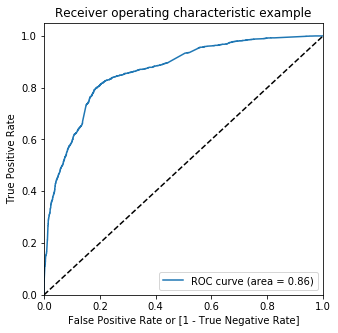

In [90]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

The area under the curve of the ROC is 0.86 which is quite good

In [91]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.207212,0,1,1,1,0,0,0,0,0,0,0
1,0,0.054409,0,1,0,0,0,0,0,0,0,0,0
2,0,0.384624,0,1,1,1,1,0,0,0,0,0,0
3,1,0.888634,1,1,1,1,1,1,1,1,1,1,0
4,1,0.544943,1,1,1,1,1,1,1,0,0,0,0


In [92]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378957  1.000000  0.000000
0.1   0.1  0.562435  0.980266  0.307477
0.2   0.2  0.725913  0.874254  0.635396
0.3   0.3  0.793391  0.830197  0.770933
0.4   0.4  0.808174  0.786140  0.821619
0.5   0.5  0.786261  0.647086  0.871185
0.6   0.6  0.779826  0.554383  0.917390
0.7   0.7  0.762435  0.450207  0.952954
0.8   0.8  0.741217  0.363469  0.971717
0.9   0.9  0.706783  0.247820  0.986838


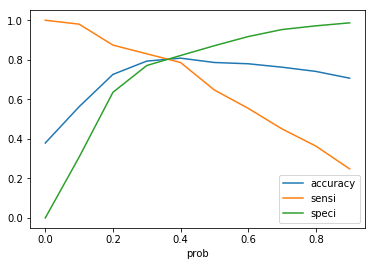

In [93]:
# plot for accuracy , sensitivity and specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.207212,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.054409,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.384624,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.888634,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.544943,1,1,1,1,1,1,1,0,0,0,0,1


In [95]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.207212,0,1,1,1,0,0,0,0,0,0,0,0,20.721224
1,0,0.054409,0,1,0,0,0,0,0,0,0,0,0,0,5.440860
2,0,0.384624,0,1,1,1,1,0,0,0,0,0,0,0,38.462421
3,1,0.888634,1,1,1,1,1,1,1,1,1,1,0,1,88.863424
4,1,0.544943,1,1,1,1,1,1,1,0,0,0,0,1,54.494267


In [96]:
#check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8081739130434783

In [97]:
# confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2934,  637],
       [ 466, 1713]], dtype=int64)

In [98]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [99]:
TP/(TP+FN)

0.6470858191831115

In [100]:
TN/(TN+FP)

0.8711845421450574

### Test Data Set

In [101]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [102]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5440,0,0.637764,0,0,0,0,0,0,0,0,0,1,0,0,0
6095,0,0.783011,0,0,0,0,0,0,0,1,0,0,1,0,0
5443,0,0.724472,0,0,0,0,0,0,0,0,0,0,0,0,0
6448,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0
5374,0,0.062060,0,1,0,0,0,0,0,0,0,1,0,0,0


In [103]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5440,1.0,0,0.637764,0,0,0,0,0,0,0,0,0,1,0,0,0
6095,1.0,0,0.783011,0,0,0,0,0,0,0,1,0,0,1,0,0
5443,1.0,0,0.724472,0,0,0,0,0,0,0,0,0,0,0,0,0
6448,1.0,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0
5374,1.0,0,0.062060,0,1,0,0,0,0,0,0,0,1,0,0,0


In [104]:
y_test_pred = res.predict(X_test_sm)

In [105]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5440,0.730693
6095,0.653904
5443,0.945128
6448,0.145307
5374,0.138722


In [106]:
y_test_df = pd.DataFrame(y_test)

In [107]:
#removing index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.730693
1,1,0.653904
2,1,0.945128
3,0,0.145307
4,0,0.138722


In [109]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.730693
1,1,0.653904
2,1,0.945128
3,0,0.145307
4,0,0.138722


In [110]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.730693,1
1,1,0.653904,1
2,1,0.945128,1
3,0,0.145307,0
4,0,0.138722,0


In [111]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.730693,1,73.069293
1,1,0.653904,1,65.390422
2,1,0.945128,1,94.512772
3,0,0.145307,0,14.530670
4,0,0.138722,0,13.872214


In [112]:
y_pred_final.sort_values(['Lead Score'], ascending=False).head(50)

,Converted,Conversion_Prob,final_predicted,Lead Score
2225,1,0.997875,1,99.787515
1982,1,0.997487,1,99.748725
147,1,0.997352,1,99.735185
1899,1,0.997352,1,99.735185
1716,1,0.997352,1,99.735185
2398,1,0.997352,1,99.735185
1189,1,0.997352,1,99.735185
1105,1,0.997352,1,99.735185
267,1,0.997352,1,99.735185
1242,1,0.997352,1,99.735185


As we can see that there are many leads whose lead score is 97.8 as calculated and identify as the HOT leads

In [113]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.788235294117647

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1289,  268],
       [ 254,  654]], dtype=int64)

In [115]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7202643171806168

In [117]:
#Let us calculate specificity
TN / float(TN+FP)

0.827874116891458